In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Regression

## Linear Regression

In [2]:
def generate_data(rule, size=100, noise_std=1):
    xx = np.random.uniform(low=0, high=100, size=size)
    noise = np.random.normal(0, noise_std, size=size)
    yy = rule(xx) + noise
    return xx, yy

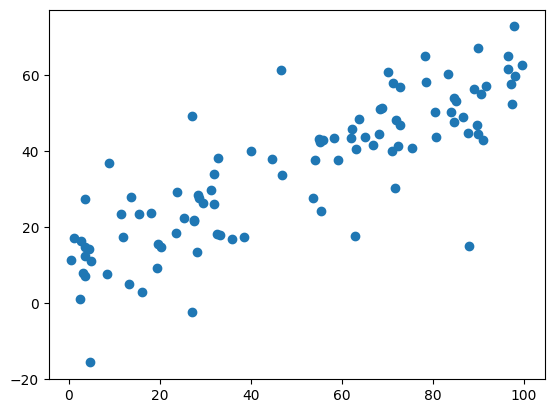

In [3]:
xx, yy = generate_data(rule=lambda x: 10 + 0.5*x, noise_std=10)
plt.scatter(xx, yy)

In [4]:
def plot_data(xx, yy, **kwargs):
    plt.scatter(xx, yy, **kwargs)
    plt.xlabel("X")
    plt.ylabel("Y")


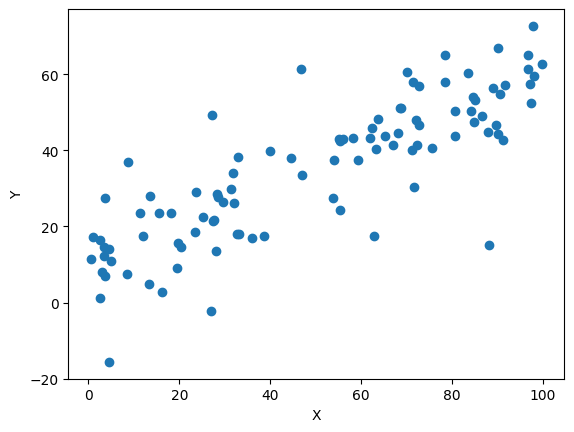

In [5]:
plot_data(xx, yy)

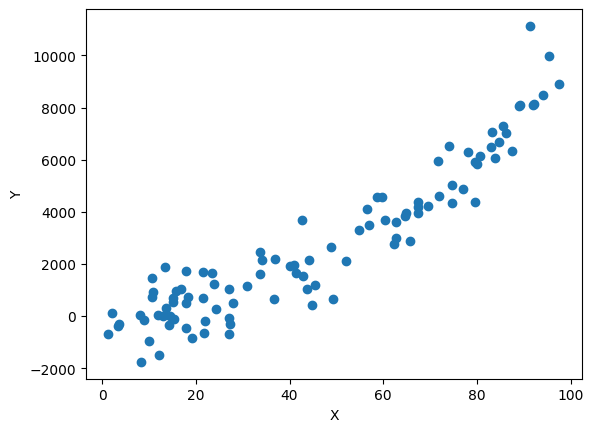

In [6]:
xx, yy = generate_data(rule=lambda x: 10 + x**2, noise_std=1000)
plot_data(xx, yy)

In [7]:
xx, yy = generate_data(rule=lambda x: 10 + 0.5*x, noise_std=10)

# General workflow

Make prediction -> Compare with ground truth -> Make a slightly better prediction <br>

Let's make a prediction!

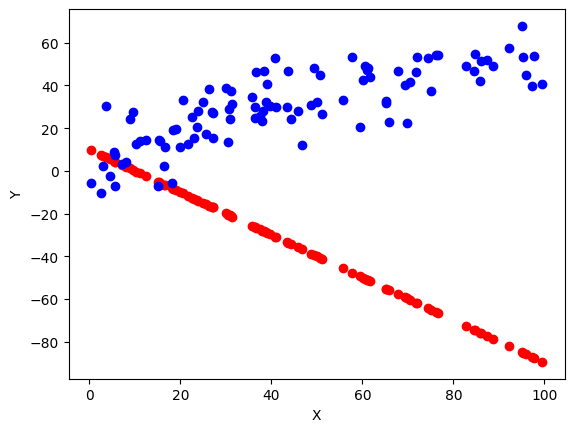

In [8]:
coefs = [10, -1] # Random prediction
plot_data(xx, coefs[0] + xx*coefs[1], color="red")
plot_data(xx, yy, color="blue")

How do we evaluate this prediction? We need to construct a cost function.

In [9]:
#TOREMOVE
def cost(truth, prediction):
    return ((truth-prediction)**2)

In [10]:
# def cost(truth, prediction):
    ### What would be a reasonable cost function?

In [11]:
## Let's check that this cost function makes sense

In [12]:
def score_prediction(xx, yy_true, coefs):
    """
    Returns the cost function associated with given coefficients.
    coefs is a list of two values - [intercept, slope].
    """
    ### That should be easy.
    #TOREMOVE
    return cost(yy_true, coefs[0] + xx*coefs[1]).sum()

Okay, we have a cost function that will allow us to evaluate any given prediction. Now we need some way to make a better prediction using this cost function. 

Our strategy will be the following: <br>
- Try changing each of the coefficients a little.
- As soon as we stumble upon a beneficial change (that makes the regression line better), we accept the new separation line.
This is not the most efficient strategy (and definitely not the one they really use in application) but it's simple and it works for this simple task!

In [13]:
def update_coefs_linreg(xx, yy_true, coefs, step_size=0.01):
    new_coefs = coefs[:] # Initialize the new coefficients with the values of old coefficients, then we will change them a little.
    ii = np.arange(len(coefs))
    np.random.shuffle(ii)
    for i in ii: # Try changing each of the coefficients a little
        delta = np.zeros(len(coefs)) 
        delta[i] = step_size # Changing ith coefficient by 'step_size'
        if score_prediction(xx, yy_true, coefs+delta) < score_prediction(xx, yy_true, coefs): # If adding delta to i-th coefficient makes the line better
            new_coefs += delta # Add this delta
            break # And end this optimization step
        elif score_prediction(xx, yy_true, coefs-delta) < score_prediction(xx, yy_true, coefs): # If subtracting delta to i-th coefficient makes the line better
            new_coefs -= delta # Subtract this delta
            break # And end this optimization step
    return new_coefs

In [14]:
coefs = [10, -1]
optimized_one_step_coefs = update_coefs_linreg(xx, yy, coefs)
print(optimized_one_step_coefs)

[10.01 -1.  ]


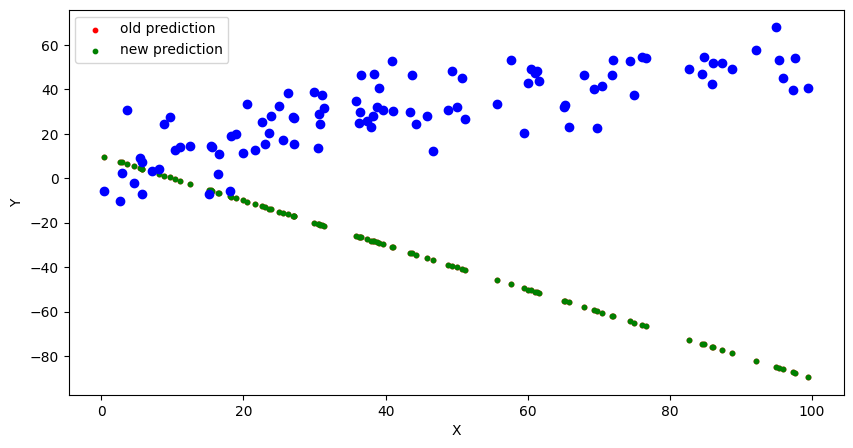

In [15]:
plt.figure(figsize=(10, 5))
plot_data(xx, coefs[0] + xx * coefs[1], color="red", label="old prediction", s=10)
plot_data(xx, optimized_one_step_coefs[0] + xx * optimized_one_step_coefs[1], 
          color="green", label="new prediction", s=10)
plot_data(xx, yy, color="blue")
plt.legend()

Now we can do our optimization!

In [16]:
def linear_regression(xx, yy, step_size=0.01):
    coefs = np.array([1.0, 1.0])
    while True:
        previous_coefs = coefs.copy()
        coefs = update_coefs_linreg(xx, yy, coefs, step_size=step_size)
        if all(previous_coefs == coefs):
            break
    return coefs

In [17]:
# We will skip this
def normalize(xx, yy):
    m_x, m_y = xx.mean(), yy.mean()
    s_x, s_y = xx.std(), yy.std()
    return (xx - m_x)/s_x, (yy - m_y)/s_y, m_x, m_y, s_x, s_y

def linear_regression(xx, yy, step_size=0.01):
    xx, yy, m_x, m_y, s_x, s_y = normalize(xx, yy)
    coefs = np.array([1.0, 1.0])
    while True:
        previous_coefs = coefs.copy()
        coefs = update_coefs_linreg(xx, yy, coefs, step_size=step_size)
        if all(previous_coefs == coefs):
            break
    b = m_y + s_y*coefs[0] - s_y/s_x * coefs[1] * m_x
    k = s_y/s_x * coefs[1]
    coefs = [b, k]    
    return coefs

In [18]:
coefs = linear_regression(xx, yy, step_size=0.01)

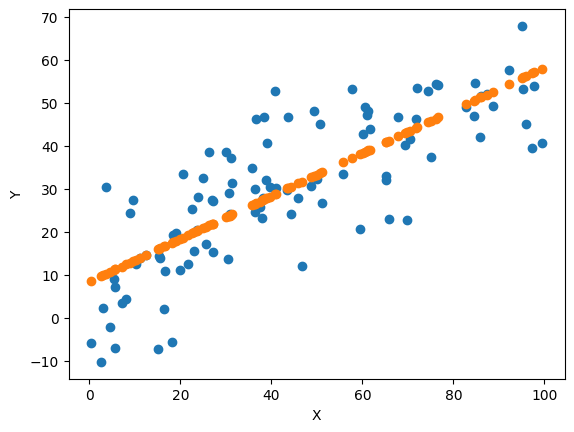

In [19]:
plot_data(xx, yy)
plot_data(xx, coefs[0] + coefs[1]*xx)

# Classification

In [20]:
def generate_data(rule, n_variables=2, size=100):
    xx = np.random.uniform(low=0, high=100, size=(size, n_variables))
    yy = []
    for i in range(xx.shape[0]): # Number of observations
        yy.append(rule(*xx[i, :])) # Apply rule function to all the features of ith observation
    yy = np.array(yy).astype(float) # Convert to numpy array of type float
    return xx, yy

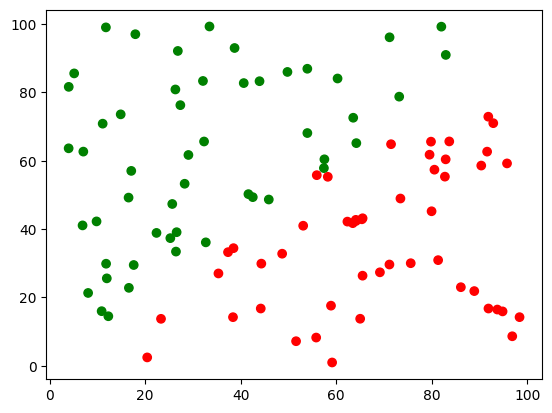

In [21]:
xx, yy = generate_data(rule=lambda x1, x2: x1 < x2)
plt.scatter(xx[:, 0], xx[:, 1], c=["red" if y == 0 else "green" for y in yy])

In [22]:
def plot_data(xx, yy):
    plt.scatter(xx[:, 0], xx[:, 1], color=["green" if y else "red" for y in yy])
    plt.xlabel("X1")
    plt.ylabel("X2")

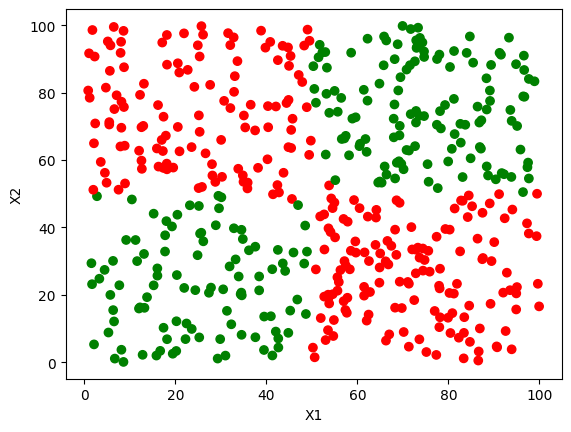

In [23]:
xx, yy = generate_data(rule=lambda x1, x2: (x1-50)*(x2-50) > 10, size=500)
plot_data(xx, yy)

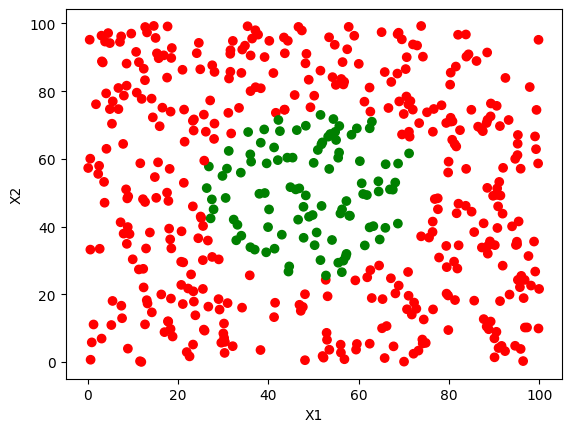

In [24]:
xx, yy = generate_data(rule=lambda x1, x2: (x1-50)**2 + (x2-50)**2 < 25**2, size=500)
plot_data(xx, yy)

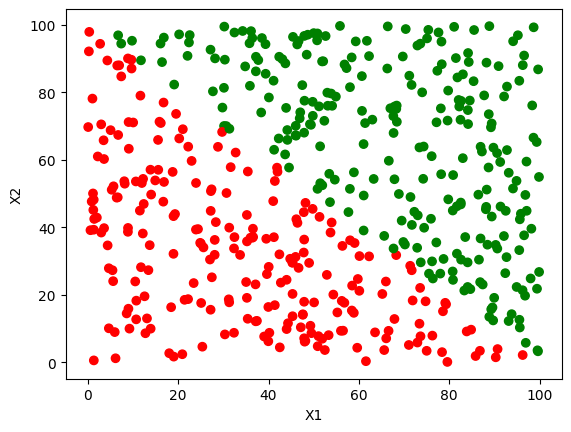

In [25]:
xx, yy = generate_data(rule=lambda x1, x2: x2 > 100-x1, size=500)
plot_data(xx, yy)

## Logistic Regression

General principle: we want to assign (?somehow?) a value to each point. If this value is, say, large, then the point is green, if it is small, then it is red. <br>
Two questions: <br>
- How to assign this value?
- How to formalize the "if large, green, if small, red" principle?
  
Let's start from the end.

### If large, green; if small, red.

This principle can be formalized with a logistic function that converts any number from $-\infty$ to $+\infty$ to a $[0, 1]$ range.

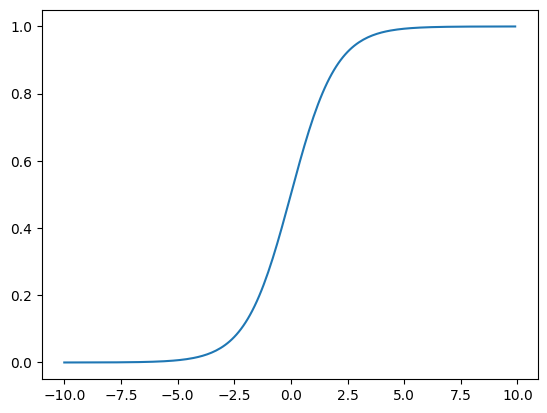

In [31]:
def logistic_function(x):
    return np.exp(x)/(1+np.exp(x))

sample_x = np.arange(-10, 10, 0.1)
sample_y = logistic_function(sample_x)
plt.plot(sample_x, sample_y)
plt.show()

So, whatever number our algorithm outputs for a certain point, we apply logistic function to it and the closer it is to 1 the more sure we are that the point should be green and the closer it is to 0, the more sure we are that the point should be red. <br>
Notice that we are only able to do it because of the limited range. We can tell exactly how close 0.99 is to 1.0

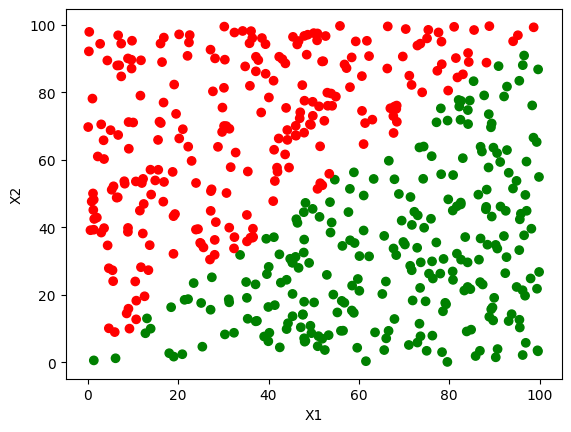

In [26]:
my_prediction_function = lambda x1, x2: x2 < x1 # Just a random prediction 
predictions = []
for i in range(xx.shape[0]):
    predictions.append(my_prediction_function(*xx[i]))
predictions = np.array(predictions).astype(float)
plot_data(xx, predictions)

Cost: <br>
$C = y*log(p) + (1-y)*log(1-p)$

|yy |prediction|C|
|---|----------|-------------|
|0|->0|?|
|0|->1|?|
|1|->0|?|
|1|->1|?|

In [27]:
def cost(truth, prediction):
    # Implement yourself
    return truth * np.log(prediction) + (1-truth)*np.log(1-prediction)

In [28]:
predictions[predictions == 0] += 1e-10
predictions[predictions == 1] -= 1e-10

In [32]:
cost(yy, predictions).sum()

-5641.333467601106

In [33]:
cost(yy, yy)

/tmp/ipykernel_40098/1245591580.py:3: RuntimeWarning: divide by zero encountered in log
  return truth * np.log(prediction) + (1-truth)*np.log(1-prediction)
/tmp/ipykernel_40098/1245591580.py:3: RuntimeWarning: invalid value encountered in multiply
  return truth * np.log(prediction) + (1-truth)*np.log(1-prediction)


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [34]:
cost(yy, (~yy.astype(bool)).astype(float))

/tmp/ipykernel_40098/1245591580.py:3: RuntimeWarning: divide by zero encountered in log
  return truth * np.log(prediction) + (1-truth)*np.log(1-prediction)


array([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -i

Now how to make predictions? I could make similar guesses over and over again, but an automated way would be preferrable...

## Logistic regression

$y = b + w_1*x_1 + w_2*x_2 + ... w_n*x_n$ (Linear regression) <br>
$y$ is from $-\infty$ to $\infty$ <br>
$y = logit(b + w_1*x_1 + w_2*x_2 + ... w_n*x_n)$ (Logistic regression) <br>
$y$ is from $0$ to $1$ <br>


Let's imagine what it will look like for only two variables ($x_1$ and $x_2$) and $b=0, w_1=1, w_2=1$ <br>
When $x1$ and $x2$ are both large, we have a logit of a large number which is equal to 1 (upper right corner).
When $x1$ and $x2$ are both small, we have a logit of a small number which is equal to 0 (lower left corner).

In [29]:
coefs = np.array([1, 1])
plot_data(xx, logistic_function(0 + xx@coefs).round())

NameError: name 'logistic_function' is not defined

Everything is equal to 1 because we are effectively in the upper right corner. If we normalize the data to center it around 0, we will get what we expected before.

In [ ]:
def normalize_features(features, return_mean_sd=False):
    means = features.mean(axis=0)
    sds = features.std(axis=0)
    return (features - means)/sds

In [ ]:
coefs = np.array([1, 1])
plot_data(normalize_features(xx), logistic_function(0 + normalize_features(xx)@coefs).round())

$b$ coefficient moves the line up/down

In [ ]:
coefs = np.array([1, 1])
plot_data(normalize_features(xx), logistic_function(2 + normalize_features(xx)@coefs).round()) # b=2

Changing the coefficients changes the inclination of the separation line.

In [ ]:
coefs = np.array([5, 1])
plot_data(normalize_features(xx), logistic_function(0 + normalize_features(xx)@coefs).round()) 

Finally, if you want the exact solution... <br>
The separation line is the one where the weighted sum of the variables is equal to 0 and the logit of is equal to 0 <br><br>
$b + w_1x_1 + w_2x_2 = 0$ <br> 
$w_2x_2 = -b - w_1x_1$ <br>
$x_2 = -\frac{b}{w_2} - \frac{w_1}{w_2}x_1$  <br><br>
This is the equation of the separation line. You can see that it's intercept with $0$ is equal to $-\frac{b}{w_2}$ and its inclination is $-\frac{w_1}{w_2}$

...

Okay, what we got now is a way to encode a separation line with n+1 parameters (n for the number of features and + 1 for b) <br>
We can also score any particular separation line with our cost function <br>

In [ ]:
def score_separation_line(xx, yy_true, coefs):
    return cost(logistic_function(xx@coefs), yy_true)

Notice that here we do not have a b coefficient. That is because it is included in coefs: our coefs will be in a form <br>
$[b, w1, w2]$ <br>
That means that xx that we pass to the function will have the following shape: <br>
$[1, x_{11}, x_{12}]$<br>
$[1, x_{21}, x_{22}]$ <br>
...<br>
$[1, x_{m1}, x_{m2}]$ <br>


So, the only thing we have to do now is to come up with a way to propose a separation line that is better than the current separation line <br>
Then we will be able to start with a random separation line and by iterative improvement get the best separation line possible! 

We will employ the same strategy as above.

In [ ]:
def update_coefs_logreg(xx, coefs, yy_true, step_size=0.001):
    new_coefs = coefs[:] # Initialize the new coefficients with the values of old coefficients, then we will change them a little.
    for i in range(len(coefs)): # Try changing each of the coefficients a little
        delta = np.zeros(len(coefs)) 
        delta[i] = step_size # Changing ith coefficient by 'step_size'
        if score_separation_line(xx, yy_true, coefs+delta) < score_separation_line(xx, yy_true, coefs): # If adding delta to i-th coefficient makes the line better
            new_coefs += delta # Add this delta
            break # And end this optimization step
        elif score_separation_line(xx, yy_true, coefs-delta) < score_separation_line(xx, yy_true, coefs): # If subtracting delta to i-th coefficient makes the line better
            new_coefs -= delta # Subtract this delta
            break # And end this optimization step
    return new_coefs

In [ ]:
coefs = np.array([1.0, 1.0, 1.0])
yy_true = yy
xx_with_ones = np.hstack([np.ones_like(yy).reshape(len(yy), 1), xx])
update_coefs_logreg(xx_with_ones, coefs, yy_true)

And we do the optimization as before

In [ ]:
def logistic_regression(xx, yy, step_size=0.001):
    # Normalization helps, if you want to know why, we can discuss
    means = xx.mean(axis=0)
    sds = xx.std(axis=0)
    xx_normalized = (xx - means)/sds
    
    xx_with_ones = np.hstack((np.ones_like(yy).reshape(len(yy), 1), xx_normalized))
    coefs = np.array([1.0]*xx_with_ones.shape[1]) # [1.0, 1.0, 1.0]
    while True:
        previous_coefs = coefs.copy()
        coefs = update_coefs_logreg(xx_with_ones, coefs, yy, step_size=step_size)
        if all(previous_coefs == coefs):
            break
            
    # We got the coefs, but they only work for the "normalized space". We have to translate them to the initial space.
    b = coefs[0] - (coefs[1:]*means/sds).sum()
    ws = list(coefs[1:]/sds)
    coefs = np.array([b] + ws)
    return coefs

In [ ]:
coefs = logistic_regression(xx, yy, step_size=0.1)

In [ ]:
b, w1, w2 = coefs
xx_for_line = np.linspace(xx[:, 0].min(), xx[:, 1].max(), 10)
yy_for_line = -b/w2 - w1/w2 * xx_for_line
plt.plot(xx_for_line, yy_for_line)
plot_data(xx, yy)

In [ ]:
def plot_splitting_line(coefs, xx):
    xx_for_line = np.array([xx[:, 0].min(), xx[:, 0].max()])
    b, w1, w2 = coefs
    yy_for_line = -b/w2 - w1/w2 * xx_for_line
    plt.plot(xx_for_line, yy_for_line)

    # Making the plot pretiter, don't worry about it
    mx, mn = xx[:, 1].max(), xx[:, 1].min()
    rng = mx-mn 
    plt.ylim(mn-0.1*rng, mx+0.1*rng)

In [ ]:
plot_data(xx, yy)
plot_splitting_line(coefs, xx)

In [ ]:
xx, yy = generate_data(n_variables=2, size=300, rule=lambda x1, x2: x1 - 3*x2 + 1 > 0)
plot_data(xx, yy)
coefs = logistic_regression(xx, yy, step_size=0.1)
plot_splitting_line(coefs, xx)

In [ ]:
xx, yy = generate_data(n_variables=2, size=200, rule=lambda x1, x2: (x1-10)**2+(x2-10)**2 < 25**2)
plot_data(xx, yy)

In [ ]:
coefs = logistic_regression(xx, yy, step_size=0.01)
print(coefs)

In [ ]:
plot_data(xx, yy)
plot_splitting_line(coefs, xx)

# Examples with real data

In [ ]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris

In [ ]:
xx = iris.sepal_length
yy = iris.sepal_width

In [ ]:
plt.scatter(xx, yy)

In [ ]:
setosas = iris.loc[iris.species == "setosa"]
xx = setosas.sepal_length
yy = setosas.sepal_width
plt.scatter(xx, yy)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [ ]:
coefs = linear_regression(xx, yy)

In [ ]:
plt.scatter(xx, yy, color="blue")
plt.scatter(xx, coefs[0] + xx*coefs[1], color="green")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [ ]:
def predict_sepal_width_from_sepal_length(sepal_length, coefs):
    #TOREMOVE
    return coefs[0] + coefs[1]*sepal_length 

In [ ]:
xx = iris.iloc[:, :2].to_numpy()
yy = (iris.species == "setosa").astype(float).to_numpy()
plot_data(xx, yy)
coefs = logistic_regression(xx, yy, step_size=0.01)
plot_splitting_line(coefs, xx)

In [ ]:
def predict(val, coefs):
    #TOREMOVE
    val = np.array([1] + list(val))
    logistic_function_result = logistic_function(val @ coefs)
    return "green" if logistic_function_result > 0.5 else "red"

In [ ]:
print(predict([3.5, 3.0], coefs))
print(predict([6.5, 3.0], coefs))